目的：OpenCV中，如何使用Kmeans()函数。

'''
在OpenCV中，Kmeans()函数原型如下所示：
retval, bestLabels, centers = kmeans(data, K, bestLabels, criteria, attempts, flags[, centers])
    data表示聚类数据，最好是np.flloat32类型的N维点集
    K表示聚类类簇数
    bestLabels表示输出的整数数组，用于存储每个样本的聚类标签索引
    criteria表示迭代停止的模式选择，这是一个含有三个元素的元组型数。格式为（type, max_iter, epsilon）
        其中，type有如下模式：
         —–cv2.TERM_CRITERIA_EPS :精确度（误差）满足epsilon停止。
         —-cv2.TERM_CRITERIA_MAX_ITER：迭代次数超过max_iter停止。
         —-cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER，两者合体，任意一个满足结束。
    attempts表示重复试验kmeans算法的次数，算法返回产生的最佳结果的标签
    flags表示初始中心的选择，两种方法是cv2.KMEANS_PP_CENTERS ;和cv2.KMEANS_RANDOM_CENTERS
    centers表示集群中心的输出矩阵，每个集群中心为一行数据
'''

1. 导入模块

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. 准备输入的数据

In [2]:
#读取原始图像灰度颜色
img = cv2.imread('lenna.png', 0) 
print (img.shape)

#获取图像高度、宽度
rows, cols = img.shape[:]

#图像二维像素转换为一维
data = img.reshape((rows * cols, 1))
data = np.float32(data)

(512, 512)


3. 准备Kmeans()函数需要用到的 参数，然后调用函数处理数据

In [3]:
#停止条件 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成4类
compactness, labels, centers = cv2.kmeans(data, 4, None, criteria, 10, flags)

#生成最终图像
dst = labels.reshape((img.shape[0], img.shape[1]))

4. 使用matplotlib库，处理结果并打印出来

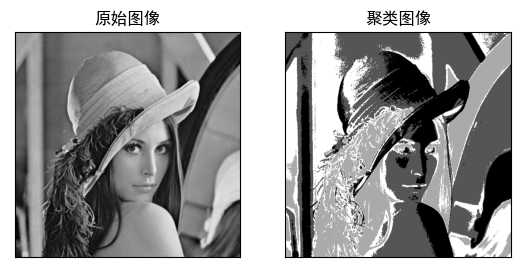

In [4]:
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图像
titles = [u'原始图像', u'聚类图像']  
images = [img, dst]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray'), 
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()